In [17]:
import imp
import json
import os
from pathlib import Path
import trimesh
import numpy as np
import SimpleITK as sitk
from PIL import Image
from utilities import utilities
import io
import pandas as pd
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
datasets = ['onkoi_NONcurated_nnunet_191', 'onkoi_curated_nnunet_190']
dfs = []
for dataset in datasets:
    base_dirpath = (
        f"/media/medical/projects/head_and_neck/onkoi_2019/dissm/{dataset}/Parotid_L"
    )
    csv_dir = join(
        base_dirpath, "interp_mesh_simplified_reg_scaled_correspondence_mix-rpm_scale50"
    )
    df = pd.read_csv(join(csv_dir, 'mahalanobis_distance.csv'), index_col=0)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['fname'] = df['path'].str.rsplit('/', 1, expand=True)[1].str.split('_target', 1, expand=True)[0]
df

,path,mahalanobis_distance,take_N_components,dice,hd95,dataset,fname
0,/media/medical/projects/head_and_neck/onkoi_20...,2.604471,20,0.873579,2.000000,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_001
1,/media/medical/projects/head_and_neck/onkoi_20...,2.491802,20,0.839429,2.915476,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_002
2,/media/medical/projects/head_and_neck/onkoi_20...,2.833407,20,0.897939,2.000000,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_003
3,/media/medical/projects/head_and_neck/onkoi_20...,3.807974,20,0.901412,2.000000,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_004
4,/media/medical/projects/head_and_neck/onkoi_20...,6.580669,20,0.873437,2.061553,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_005
...,...,...,...,...,...,...,...
106,/media/medical/projects/head_and_neck/onkoi_20...,4.154875,20,0.882369,2.121320,onkoi_curated_nnunet_190,ONKOI-bothM-dataset-paper_052
107,/media/medical/projects/head_and_neck/onkoi_20...,2.977456,20,0.858794,2.692582,onkoi_curated_nnunet_190,ONKOI-bothM-dataset-paper_053
108,/media/medical/projects/head_and_neck/onkoi_20...,2.988292,20,0.806630,3.201562,onkoi_curated_nnunet_190,ONKOI-bothM-dataset-paper_054
109,/media/medical/projects/head_and_neck/onkoi_20...,2.452448,20,0.893019,2.500000,onkoi_curated_nnunet_190,ONKOI-bothM-dataset-paper_055


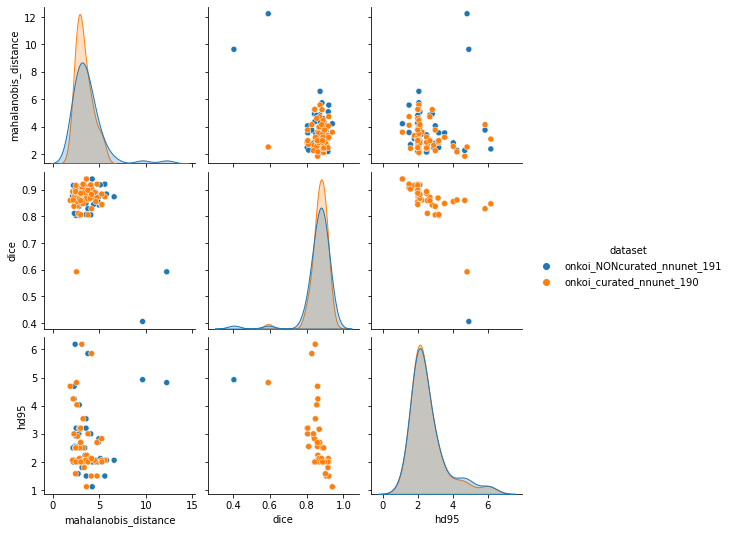

In [19]:
# sns.pairplot(df.loc[df['dice']< 0.75, :], hue="dataset", vars=['mahalanobis_distance', 'dice', 'hd95'])
# sns.pairplot(df.loc[df['hd95'] < 40, :], hue="dataset", vars=['mahalanobis_distance', 'dice', 'hd95'])
sns.pairplot(df, hue="dataset", vars=['mahalanobis_distance', 'dice', 'hd95'])

In [20]:
df.max()

path                    /media/medical/projects/head_and_neck/onkoi_20...
mahalanobis_distance                                              12.2352
take_N_components                                                      20
dice                                                             0.940157
hd95                                                              6.18466
dataset                                          onkoi_curated_nnunet_190
fname                                       ONKOI-bothM-dataset-paper_056
dtype: object

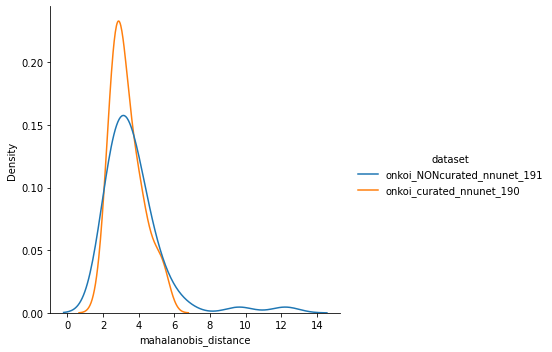

In [21]:
sns.displot(df, x='mahalanobis_distance', hue='dataset', kind="kde")

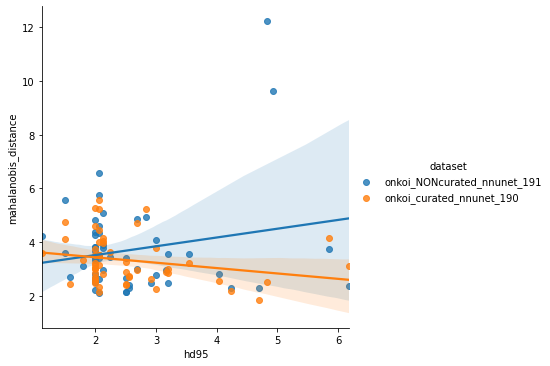

In [22]:
sns.lmplot(x="hd95", y="mahalanobis_distance", hue="dataset", data=df)

In [23]:
a = df.sort_values('mahalanobis_distance', ascending=False).head(50)

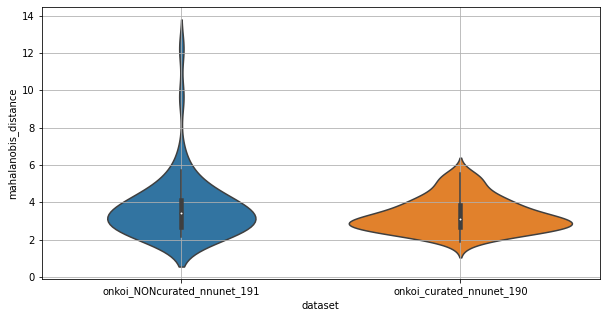

In [24]:

plt.figure(figsize=(10,5))
sns.violinplot(x="dataset", y="mahalanobis_distance", data=df)
plt.grid()